Analisi di $R^{2}$ e $MAE~$ in funzione della grandezza del dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np

R2_50 = [0.975831, 0.986558, 0.989601, 0.991889, 0.994026]
R2_32 = [0.984095, 0.98493, 0.989075, 0.991605, 0.990587]
R2_32_adattata = [0.9784811532548627, 0.9865992196276022, 0.988524834136303, 0.9910216746128798, 0.9947638295281095]
R2_18 = [0.961985, 0.965246, 0.960034, 0.972101, 0.974052]
mae_50 = [0.043602, 0.030997, 0.026506, 0.023303, 0.019833]
mae_32 = [0.032974, 0.033604, 0.027208, 0.024573, 0.024991]
mae_32_adattata = [0.03985163671298937, 0.03128461162255304, 0.02918425606453506, 0.02574145311500929, 0.018569014146393503]
mae_18 = [0.0543855, 0.051827, 0.056691, 0.045786, 0.045014]
#sizes = np.linspace(20000, 100000, 5)
sizes = [22136, 33204, 44272, 60875, 99612]

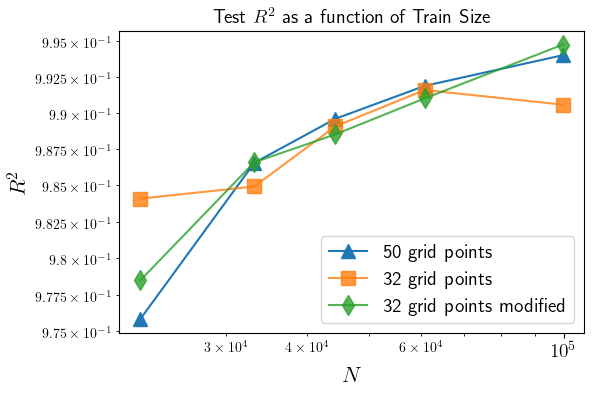

In [2]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['text.usetex'] = True


plt.plot(sizes, R2_50, marker="^", ms=10, label="50 grid points")
plt.plot(sizes, R2_32, marker="s", alpha=.8, ms=10, label="32 grid points")
#plt.plot(sizes, R2_18, marker="D", alpha=.8, ms=10, label="18 grid points")
plt.plot(sizes, R2_32_adattata, marker="d", alpha=.8, ms=10, label="32 grid points modified")
plt.xscale("log")
plt.yscale("log")
plt.legend(loc=4, prop={'size': 14})
plt.xlabel("$N$", fontsize=16)
plt.ylabel("$R^2$", fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.title("Test $R^2$ as a function of Train Size", fontsize=14)
plt.show()

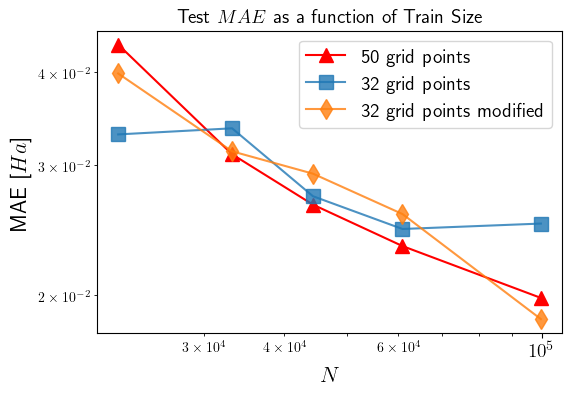

In [3]:
plt.plot(sizes, mae_50, marker="^", ms=10, color='r', label="50 grid points")
plt.plot(sizes, mae_32, marker="s", alpha=.8, ms=10, label="32 grid points")
#plt.plot(sizes, mae_18, marker="D", alpha=.8, ms=10, label="18 grid points")
plt.plot(sizes, mae_32_adattata, marker="d", alpha=.8,  ms=10, label="32 grid points modified")
plt.xscale("log")
plt.yscale("log")

plt.xlabel("$N$", fontsize=16)
plt.ylabel(f"MAE [$Ha$]", fontsize=16)
plt.legend(loc=1, prop={'size': 14})
plt.title("Test $MAE$ as a function of Train Size", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Confronto della migliore rete con risoluzione 50 e 32


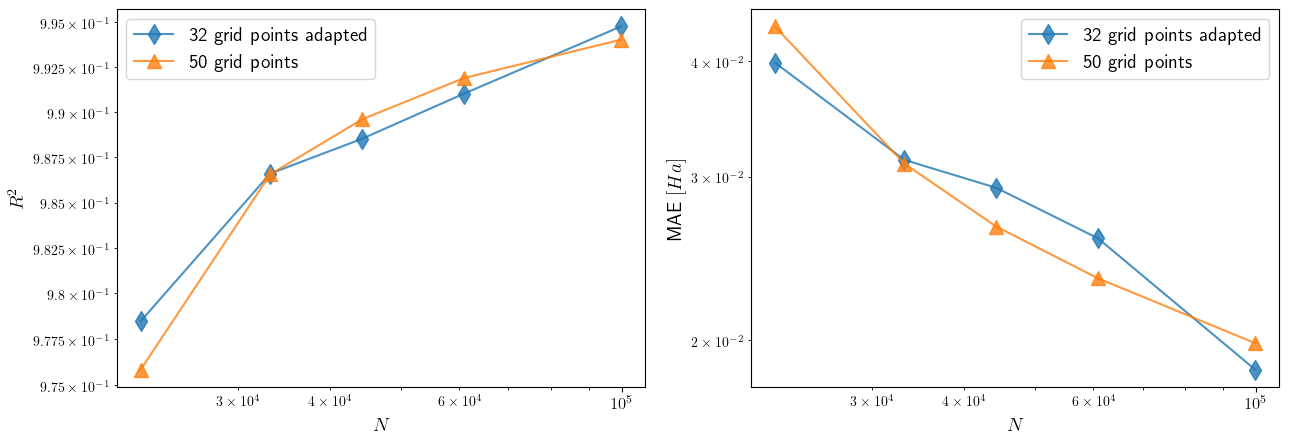

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 5))

ax1.plot(sizes, R2_32_adattata, marker="d", ms=10, alpha=.8, label="32 grid points adapted")
ax2.plot(sizes, mae_32_adattata, marker="d", ms=10, alpha=.8, label="32 grid points adapted")
ax1.plot(sizes, R2_50, marker="^", ms=10, alpha=.8, label="50 grid points")
ax2.plot(sizes, mae_50, marker="^", ms=10, alpha=.8, label="50 grid points")
ax1.legend(prop={"size": 14})
ax2.legend(prop={"size": 14})
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax1.set_xlabel("$N$", size=14)
ax1.set_ylabel("$R^2$", size=14)
ax2.set_xlabel("$N$", size=14)
ax2.set_ylabel("MAE $[Ha]$", size=14)
    
plt.show()



Molecules size histograms:

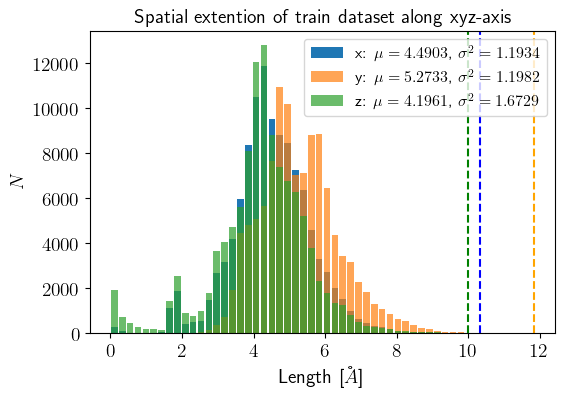

In [5]:
# from scipy.stats import norm
train_sizes = np.load("/Users/lucabrodoloni/Desktop/Stage/workgpu/train_size_dict.npz")
# Mean Values
x_mean = round(train_sizes["sizes_x"].mean(), 4)
y_mean = round(train_sizes["sizes_y"].mean(), 4)
z_mean = round(train_sizes["sizes_z"].mean(), 4)

# Max values 
x_max = train_sizes["sizes_x"].max()
y_max = train_sizes["sizes_y"].max()
z_max = train_sizes["sizes_z"].max()

# Variances
x_var = round(train_sizes["sizes_x"].var(), 4)
y_var = round(train_sizes["sizes_y"].var(), 4)
z_var = round(train_sizes["sizes_z"].var(), 4)

# (mu, sigma) = norm.fit(train_sizes)
# print(mu, sigma)
plt.hist(train_sizes["sizes_x"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=1, label=f"x: $\mu={x_mean}$, $\sigma^2={x_var}$")
plt.hist(train_sizes["sizes_y"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=0.7, label=f"y: $\mu={y_mean}$, $\sigma^2={y_var}$")
plt.hist(train_sizes["sizes_z"], bins=50, range=(0, 11), density=False, rwidth=0.85, alpha=0.7, label=f"z: $\mu={z_mean}$, $\sigma^2={z_var}$")
plt.legend(prop={"size": 11.5})
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Length [$\AA$]", size=14)
plt.ylabel("$N$", size=14)
plt.title("Spatial extention of train dataset along xyz-axis", size=14)
plt.axvline(x_max, c='b', linestyle='--')
plt.axvline(y_max, c='orange', linestyle='--')
plt.axvline(z_max, c='g', linestyle='--')
# plt.hist(train_sizes["sizes_y"], bins=100, range=(0, 11), density=False)
# plt.hist(train_sizes["sizes_z"], bins=100, range=(0, 11), density=False)
plt.show()

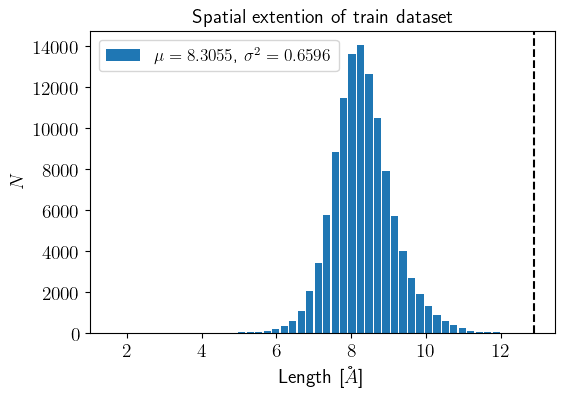

12.88651072470579


In [6]:

mean_size = round(train_sizes["size"].mean(), 4)
var_size = round(train_sizes["size"].var(), 4)
 
plt.hist(train_sizes["size"], bins=50, density=False, rwidth=0.85, alpha=1, label=f"$\mu={mean_size}$, $\sigma^2={var_size}$")
plt.legend(prop={"size":12.5})
plt.xticks(size=14)
plt.yticks(size=14)

plt.xlabel("Length [$\AA$]", size=14)
plt.ylabel("$N$", size=14)
plt.title("Spatial extention of train dataset", size=14)
plt.axvline(train_sizes["size"].max(), c='k', linestyle='--')
plt.show()
print(train_sizes["size"].max())

Test Predicitons Scatter Plots:


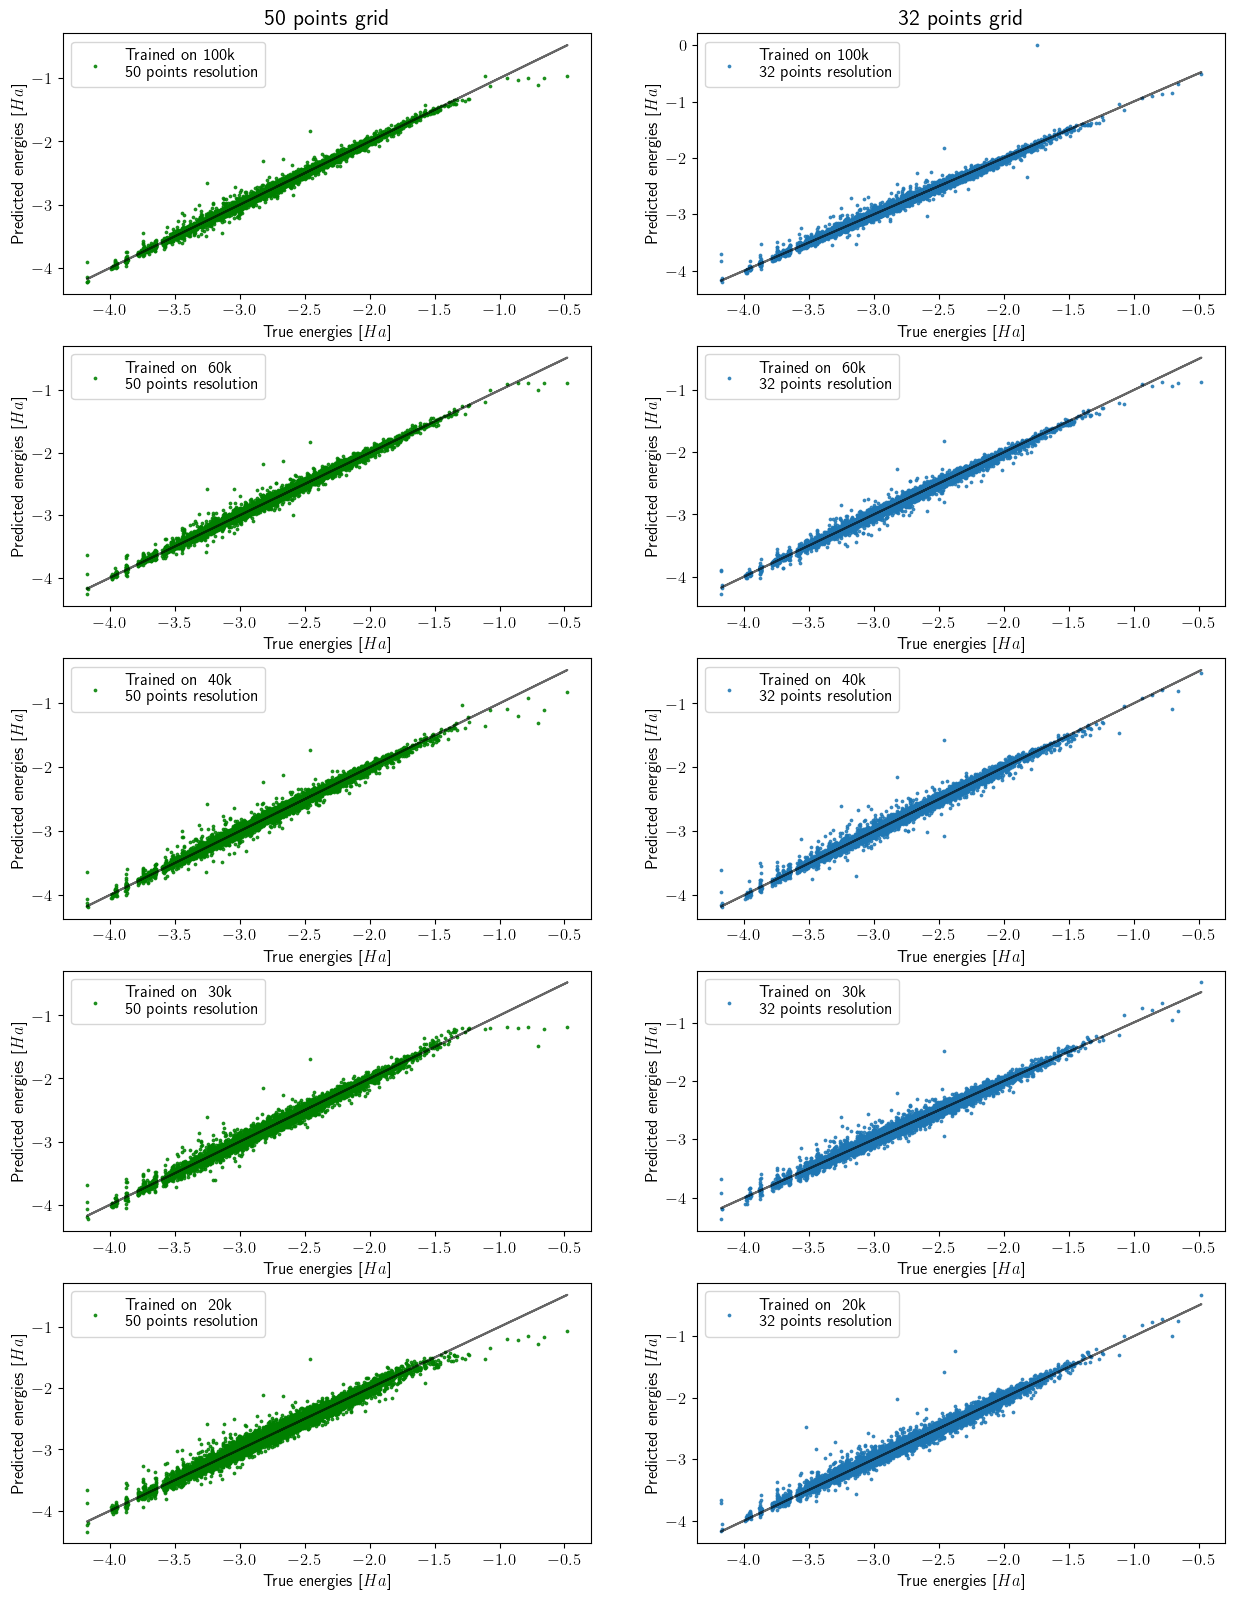

In [7]:
predictions_path = "/Users/lucabrodoloni/Desktop/Stage/workgpu/predictions/"
true_targets_test = np.loadtxt(f"{predictions_path}/true_values_test.txt")

grid32_100k_adattata = np.loadtxt(f"{predictions_path}/99612train_32grid_prediction_adattata.txt")
grid50_100k = np.loadtxt(f"{predictions_path}/99612train_50grid_prediction.txt")
grid32_100k = np.loadtxt(f"{predictions_path}/99612train_32grid_prediction.txt")
grid50_60k = np.loadtxt(f"{predictions_path}/60875train_50grid_prediction.txt")
grid32_60k = np.loadtxt(f"{predictions_path}/60875train_32grid_prediction.txt")
grid50_40k = np.loadtxt(f"{predictions_path}/44272train_50grid_prediction.txt")
grid32_40k = np.loadtxt(f"{predictions_path}/44272train_32grid_prediction.txt")
grid50_30k = np.loadtxt(f"{predictions_path}/33204train_50grid_prediction.txt")
grid32_30k = np.loadtxt(f"{predictions_path}/33204train_32grid_prediction.txt")
grid50_20k = np.loadtxt(f"{predictions_path}/22136train_50grid_prediction.txt")
grid32_20k = np.loadtxt(f"{predictions_path}/22136train_32grid_prediction.txt")
#color = np.random.rand(len(true_targets_test))
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15, 20))
ax[0][0].set_title("50 points grid", size=16)
ax[0][1].set_title("32 points grid", size=16)




ax[0][0].scatter(true_targets_test, grid50_100k, c='Green', s=3, alpha=0.8, label='Trained on 100k \n50 points resolution')
ax[0][1].scatter(true_targets_test, grid32_100k,  s=3, alpha=0.8, label='Trained on 100k \n32 points resolution')
ax[1][0].scatter(true_targets_test, grid50_60k, s=3, c='Green', alpha=0.8, label='Trained on ~60k \n50 points resolution')
ax[1][1].scatter(true_targets_test, grid32_60k, s=3, alpha=0.8, label='Trained on ~60k \n32 points resolution')
ax[2][0].scatter(true_targets_test, grid50_40k, s=3, c='Green', alpha=0.8, label='Trained on ~40k \n50 points resolution')
ax[2][1].scatter(true_targets_test, grid32_40k, s=3, alpha=0.8, label='Trained on ~40k \n32 points resolution')
ax[3][0].scatter(true_targets_test, grid50_30k, s=3, c='Green', alpha=0.8, label='Trained on ~30k \n50 points resolution')
ax[3][1].scatter(true_targets_test, grid32_30k, s=3, alpha=0.8, label='Trained on ~30k \n32 points resolution')
ax[4][0].scatter(true_targets_test, grid50_20k, s=3, c='Green',  alpha=0.8, label='Trained on ~20k \n50 points resolution')
ax[4][1].scatter(true_targets_test, grid32_20k, s=3, alpha=0.8, label='Trained on ~20k \n32 points resolution')

for i in range(5):
    for j in range(2):
        ax[i][j].set_xlabel("True energies [$Ha$]", size=12)
        ax[i][j].set_ylabel("Predicted energies [$Ha$]", size=12)
        ax[i][j].tick_params(axis='x', labelsize=12)
        ax[i][j].tick_params(axis='y', labelsize=12)
        ax[i][j].legend(prop={"size": 12})
        ax[i][j].plot(true_targets_test, true_targets_test, c='k',  alpha=0.6, label='Theoretical')

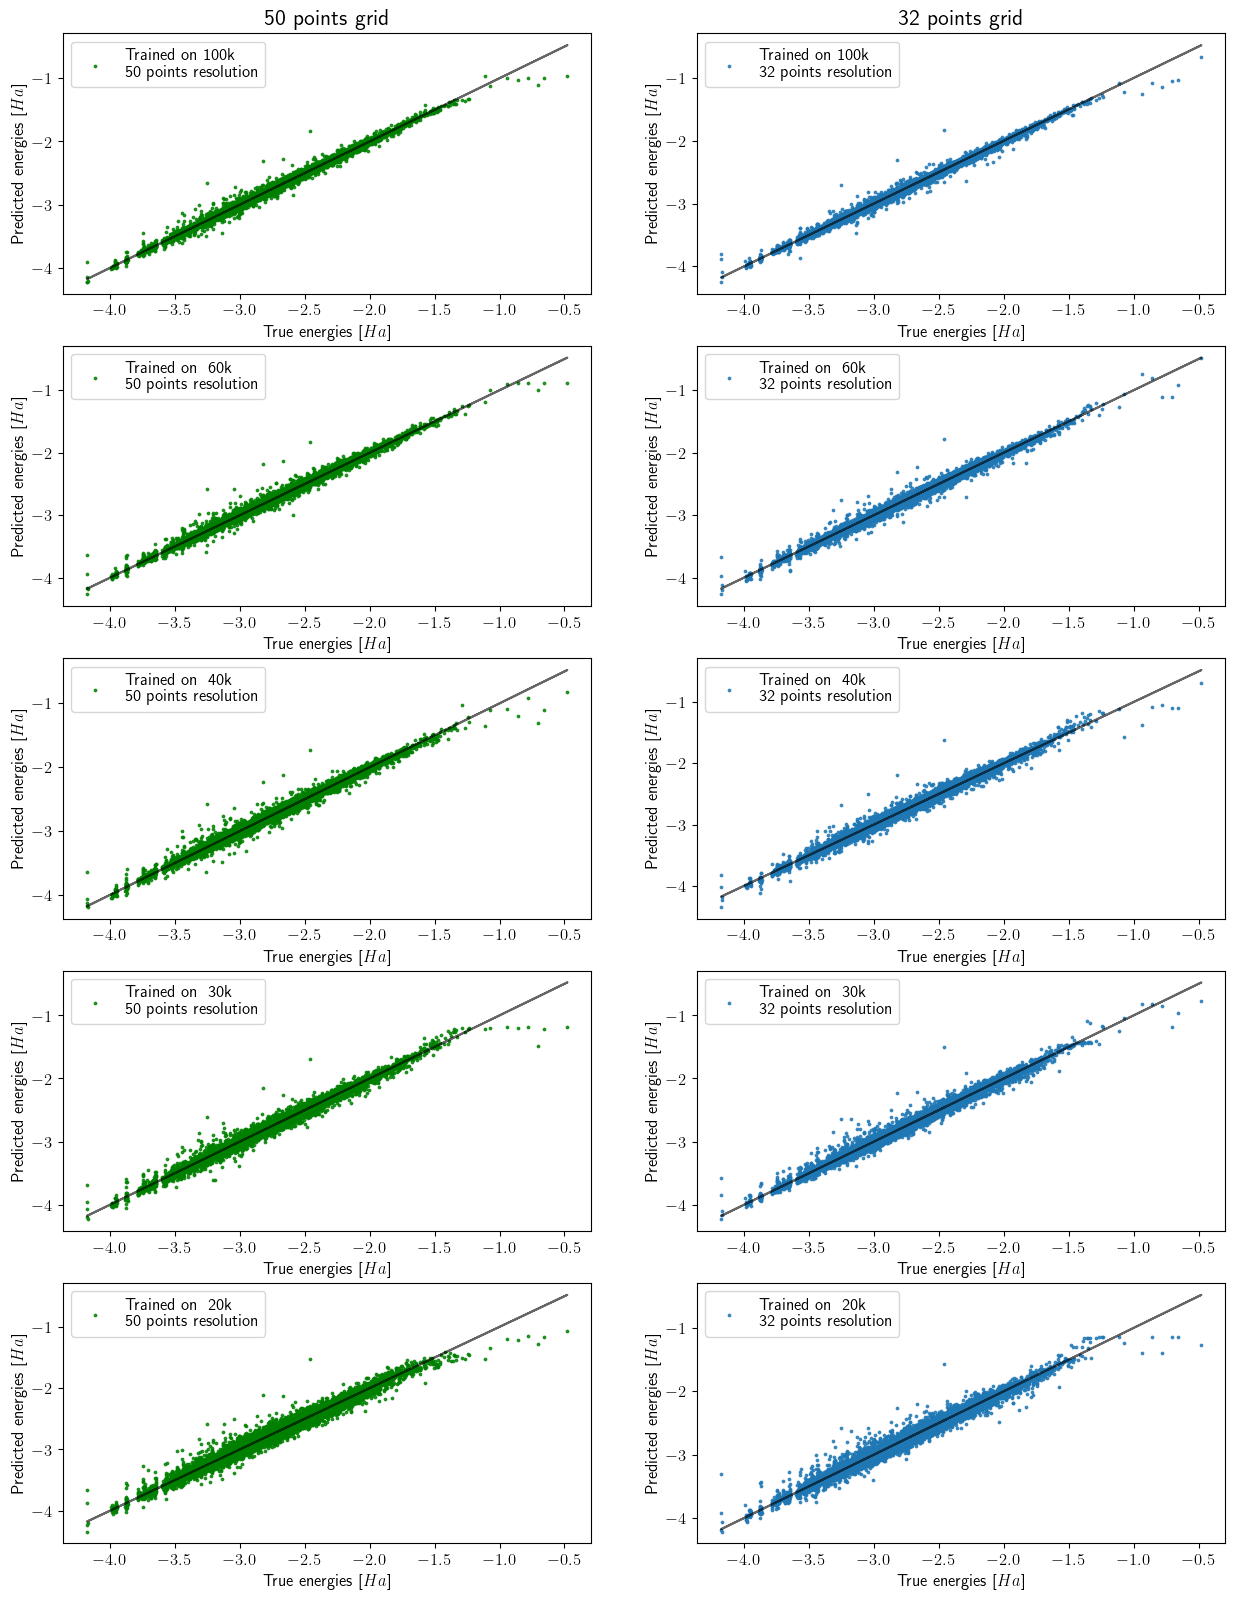

In [8]:
grid32_100k_adattata = np.loadtxt(f"{predictions_path}/99612train_32grid_prediction_adattata.txt")
grid50_100k = np.loadtxt(f"{predictions_path}/99612train_50grid_prediction.txt")
grid50_60k = np.loadtxt(f"{predictions_path}/60875train_50grid_prediction.txt")
grid32_60k_adattata = np.loadtxt(f"{predictions_path}/60875train_32grid_prediction_adattata.txt")
grid50_40k = np.loadtxt(f"{predictions_path}/44272train_50grid_prediction.txt")
grid32_40k_adattata = np.loadtxt(f"{predictions_path}/44272train_32grid_prediction_adattata.txt")
grid50_30k = np.loadtxt(f"{predictions_path}/33204train_50grid_prediction.txt")
grid32_30k_adattata = np.loadtxt(f"{predictions_path}/33204train_32grid_prediction_adattata.txt")
grid50_20k = np.loadtxt(f"{predictions_path}/22136train_50grid_prediction.txt")
grid32_20k_adattata = np.loadtxt(f"{predictions_path}/22136train_32grid_prediction_adattata.txt")
#color = np.random.rand(len(true_targets_test))
fig, ax = plt.subplots(nrows=5, ncols=2, sharex=False, sharey=False, figsize=(15, 20))
ax[0][0].set_title("50 points grid", size=16)
ax[0][1].set_title("32 points grid", size=16)




ax[0][0].scatter(true_targets_test, grid50_100k, c='Green', s=3, alpha=0.8, label='Trained on 100k \n50 points resolution')
ax[0][1].scatter(true_targets_test, grid32_100k_adattata,  s=3, alpha=0.8, label='Trained on 100k \n32 points resolution')
ax[1][0].scatter(true_targets_test, grid50_60k, s=3, c='Green', alpha=0.8, label='Trained on ~60k \n50 points resolution')
ax[1][1].scatter(true_targets_test, grid32_60k_adattata, s=3, alpha=0.8, label='Trained on ~60k \n32 points resolution')
ax[2][0].scatter(true_targets_test, grid50_40k, s=3, c='Green', alpha=0.8, label='Trained on ~40k \n50 points resolution')
ax[2][1].scatter(true_targets_test, grid32_40k_adattata, s=3, alpha=0.8, label='Trained on ~40k \n32 points resolution')
ax[3][0].scatter(true_targets_test, grid50_30k, s=3, c='Green', alpha=0.8, label='Trained on ~30k \n50 points resolution')
ax[3][1].scatter(true_targets_test, grid32_30k_adattata, s=3, alpha=0.8, label='Trained on ~30k \n32 points resolution')
ax[4][0].scatter(true_targets_test, grid50_20k, s=3, c='Green',  alpha=0.8, label='Trained on ~20k \n50 points resolution')
ax[4][1].scatter(true_targets_test, grid32_20k_adattata, s=3, alpha=0.8, label='Trained on ~20k \n32 points resolution')

for i in range(5):
    for j in range(2):
        ax[i][j].set_xlabel("True energies [$Ha$]", size=12)
        ax[i][j].set_ylabel("Predicted energies [$Ha$]", size=12)
        ax[i][j].tick_params(axis='x', labelsize=12)
        ax[i][j].tick_params(axis='y', labelsize=12)
        ax[i][j].legend(prop={"size": 12})
        ax[i][j].plot(true_targets_test, true_targets_test, c='k',  alpha=0.6, label='Theoretical')

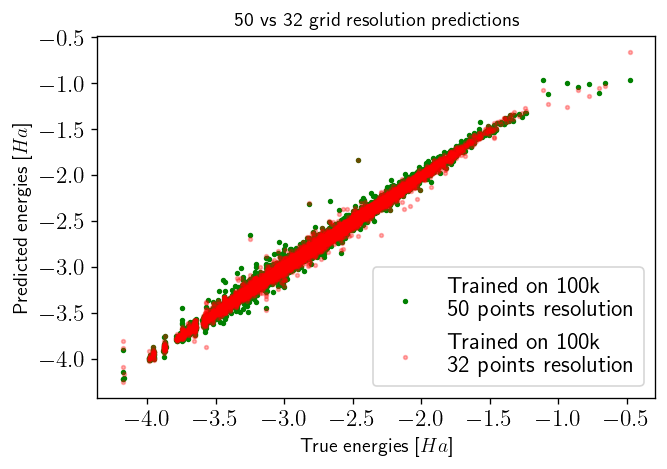

In [9]:
plt.rcParams['figure.dpi'] = 120
plt.scatter(true_targets_test, grid50_100k, c='Green', s=5, alpha=1, label='Trained on 100k \n50 points resolution')
plt.scatter(true_targets_test, grid32_100k_adattata, c='r', s=5, alpha=.3, label='Trained on 100k \n32 points resolution')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(prop={'size': 14})
plt.xlabel("True energies [$Ha$]", size=12)
plt.ylabel("Predicted energies [$Ha$]", size=12)
plt.title("50 vs 32 grid resolution predictions")
plt.savefig("/Users/lucabrodoloni/Desktop/50vs32_pred_comparison.png", facecolor="w")
plt.show()

[-12651.80116205 -11510.26774809  -9495.88641983 ... -10532.11383828
  -9555.73120012 -11375.09177159]
[[-1.35679649]
 [-0.3051034 ]
 [ 1.5507432 ]
 ...
 [ 0.59606838]
 [ 1.49560829]
 [-0.18056597]]
Mean internal energy at 0k in dataset [eV]: -11179.101045905907
Mean internal energy at 0k in dataset [Ha]: -410.82417831886295


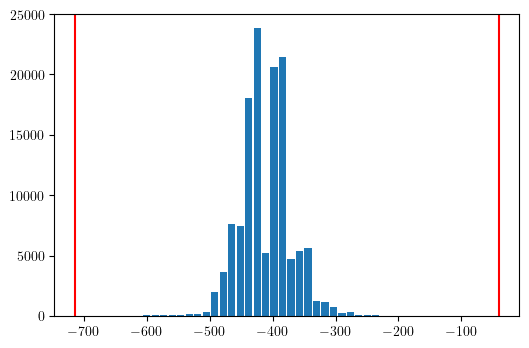

In [10]:
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.dpi'] = 100 
scaler = StandardScaler()
dataset_energies = np.load("/Users/lucabrodoloni/Desktop/Stage/workgpu/energies_dict.npz")
# print(type(dataset_energies[2]))
energies_eV = dataset_energies["internal_energy0k"] * 27.2114
print(energies_eV)
standardized_energies = scaler.fit_transform(dataset_energies["internal_energy0k"].reshape(-1, 1))
mean_int_eV = energies_eV.mean()
mean_int_Ha = dataset_energies["internal_energy0k"].mean()
no_data = len(dataset_energies["internal_energy0k"])
print(standardized_energies)

print(f"Mean internal energy at 0k in dataset [eV]: {energies_eV.mean()}")
print(f"Mean internal energy at 0k in dataset [Ha]: {mean_int_Ha}")


plt.hist(dataset_energies["internal_energy0k"], bins=50, rwidth=0.85)
plt.axvline(dataset_energies["internal_energy0k"].max(), c='r')
plt.axvline(dataset_energies["internal_energy0k"].min(), c='r')
plt.show()

In [11]:
dataset_energies["internal_energy0k"]

array([-464.944882, -422.994324, -348.967213, ..., -387.047849,
       -351.166467, -418.026701])

# Analisi dati con difference energy per atoms target:

## Stessa rete di target = diff_energy:

R2 = 0.9630462828573509 \
mae = 0.0009334738759971083

## Controllo molecole che danno più errore:


In [12]:
import collections

# Previsioni 
grid32_100k_adattata_pred = grid32_100k_adattata 
# Accoppio ogni previsione con ogni risultato
test_id = np.loadtxt("/Users/lucabrodoloni/Desktop/Stage/workgpu/predictions/id_numbers_test_set.txt", dtype=int)
n_atoms = np.loadtxt("/Users/lucabrodoloni/Desktop/Stage/workgpu/predictions/number_atoms.txt", dtype=int)
pred_theor_coupled = list(zip(true_targets_test, grid32_100k_adattata_pred, test_id))

abs_errors = []
for j in range(len(pred_theor_coupled)):
    abs_errors.append(abs(pred_theor_coupled[j][0] - pred_theor_coupled[j][1]))
abs_error_id = list(zip(abs_errors, n_atoms, test_id))

spieces_npz = np.load("/Users/lucabrodoloni/Desktop/Stage/workgpu/predictions/atomic_numbers.npz")
atomic_spieces = [spieces_npz[array] for array in spieces_npz.files]


In [13]:
# Converto tutti numeri atomici in int
int_atomic_spieces = []
for i in range(len(atomic_spieces)):
    int_atomic_spieces.append(atomic_spieces[i].astype(int))
# Conto le occorrenze di ogni specie atomica nella molecola
print(collections.Counter(int_atomic_spieces[0])[1])

5


In [14]:
# Creo lista contentente il numero di specie atomiche presenti in ogni molecola di test
number_H = [collections.Counter(int_atomic_spieces[i])[1] for i in range(len(int_atomic_spieces))]
number_C = [collections.Counter(int_atomic_spieces[i])[6] for i in range(len(int_atomic_spieces))]
number_N = [collections.Counter(int_atomic_spieces[i])[7] for i in range(len(int_atomic_spieces))]
number_O = [collections.Counter(int_atomic_spieces[i])[8] for i in range(len(int_atomic_spieces))]
number_F = [collections.Counter(int_atomic_spieces[i])[9] for i in range(len(int_atomic_spieces))]

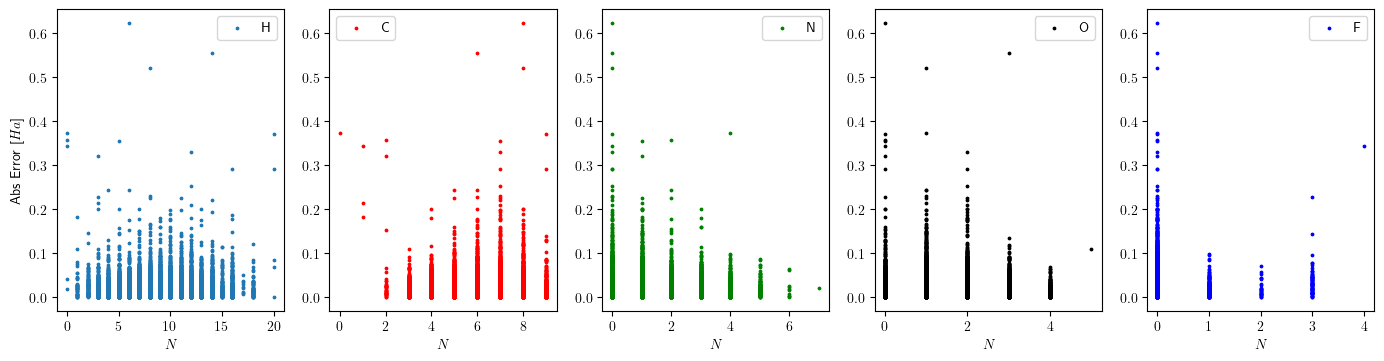

In [15]:
fig, ax = plt.subplots(1, 5, figsize=(17,4))

ax[0].scatter(number_H, abs_errors, s=3, label="H")
ax[1].scatter(number_C, abs_errors, s=3, label="C", c='r')
ax[2].scatter(number_N, abs_errors, s=3, label="N", c='g')
ax[3].scatter(number_O, abs_errors, s=3, label="O", c='k')
ax[4].scatter(number_F, abs_errors, s=3, label="F", c='b')
ax[0].set_ylabel("Abs Error [$Ha$]")
for i in range(len(ax)):
    ax[i].legend()
    ax[i].set_xlabel("$N$")




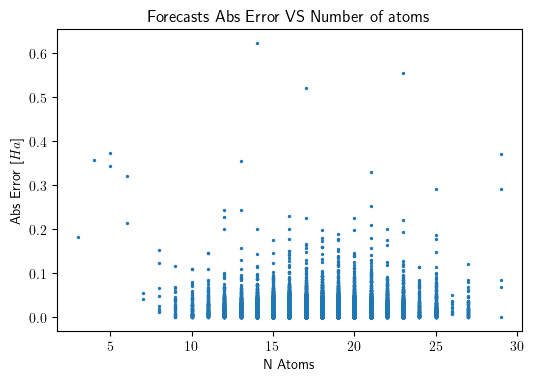

In [21]:
plt.scatter(n_atoms, abs_errors, s=2)
plt.xlabel("N Atoms")
plt.ylabel("Abs Error [$Ha$]")
plt.title("Forecasts Abs Error VS Number of atoms ")
plt.show()

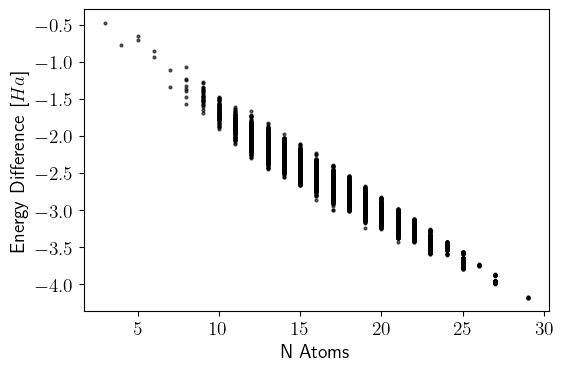

In [17]:
plt.scatter(n_atoms, true_targets_test, s=4, alpha=.6, c='k')
plt.xlabel("N Atoms", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Energy Difference [$Ha$]", size=14)
plt.show()


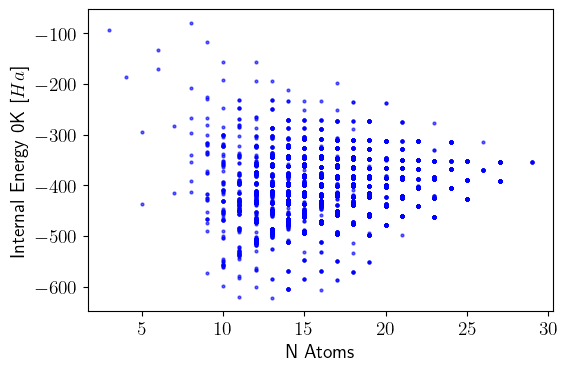

In [18]:
internal_energies0k = np.loadtxt("/Users/lucabrodoloni/Desktop/Stage/workgpu/predictions/internal_energies0k.txt")
plt.scatter(n_atoms, internal_energies0k, s=4, alpha=.6, c='b')
plt.xlabel("N Atoms", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Internal Energy 0K [$Ha$]", size=14)
plt.savefig("/Users/lucabrodoloni/Desktop/Natoms_vs_IntEn.png", facecolor='w')
plt.show()

In [20]:
internal_energies0k.max()

-79.764152